<center>

# Relazione 10

</center>

**NB:** in questa esercitazione è utilizzata la libreria random.h, necessaria per generare uniformemente numeri casuali. Tale libreria si trova nella cartella RANDOM_GEN: per compilare è prima necessario utilizzare il comando 'source setup.sh'. Il file setup.sh si trova nella cartella LSN_Delivery

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

L'obiettivo dell'esercitazione 10 è la parallelizzazione dell'esercitazione 9, ossia eseguire su più core la ricerca del percorso migliore che colleghi le 50 capitali degli Stati Uniti.

Ho lavorato sulle macchine di laboratorio (nel caso qualche componente dell'esercitazione si dovesse essere corrotto durante la copia mediante SCP l'esercitazione è ancora presente sulle macchine di laboratorio). Ho eseguito la parallelizzazione su 6 core lavorando:
1. senza migrazione

2. con migrazione

La migrazione consiste nello scambio casuale fra diverse popolazioni (sono una per ogni core) dell'elemento migliore. Io ho performato questo scambio 10 volte, ossia una volta ogni 100 generazioni di Genetic Algoritm. Ho creato su ogni core un elemento di tipo TravelingSalesman caratterizzato da:
$$
\begin{cases}
    N_{camm}\,=\,200 \\
    N_{gen}\,=\,1000
\end{cases}
$$
Mi sono posto in queste condizioni perchè consentono di verificare come l'implementazione delle Migrazioni porti a dei risultati migliori. Sebbene i minimi locali raggiunti nelle esecuzioni senza migrazioni sono già delle buone ottimizzazioni e si avvicinano di molto al minimo globale, non reggono il confronto con le soluzioni ottenute con migrazioni.

In seguito riporto quanto ottenuto per ciascuna delle core utilizzata.

In [16]:
nconf = np.loadtxt("Osservabili/Config_NoMigr.dat", unpack=True)
nbest = np.loadtxt("Osservabili/best_NoMigr.dat", unpack=True)
nmean = np.loadtxt("Osservabili/mean_NoMigr.dat", unpack=True)

sconf = np.loadtxt("Osservabili/Config_Migr.dat", unpack=True)
sbest = np.loadtxt("Osservabili/best_Migr.dat", unpack=True)
smean = np.loadtxt("Osservabili/mean_Migr.dat", unpack=True)

### Nodo 0

Lunghezza best (No migrazione): 282.713
Lunghezza best (migrazione): 269.646


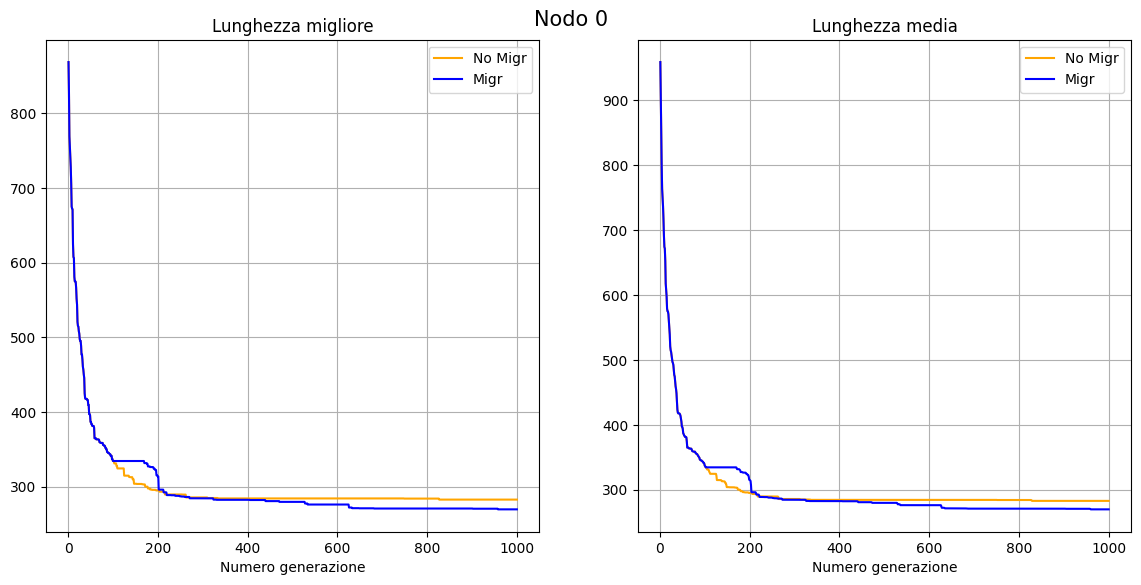

In [17]:
n = 0

fig = plt.figure(figsize = (14, 6))
print("Lunghezza best (No migrazione): " + str(nbest[1, 999 + 1000*n]))
print("Lunghezza best (migrazione): " + str(sbest[1, 999 + 1000*n]))

#Andamento best
ax1 = fig.add_subplot(121)
ax1.plot(nbest[0, n*1000 : (n+1)*1000], nbest[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax1.plot(np.array([i for i in range(1, 1001)]), sbest[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax1.set_title("Lunghezza migliore")
ax1.set_xlabel("Numero generazione")
ax1.grid(True)
ax1.legend()

#Andamento mean
ax2 = fig.add_subplot(122)
ax2.plot(nmean[0, n*1000 : (n+1)*1000], nmean[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax2.plot(np.array([i for i in range(1, 1001)]), smean[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax2.set_title("Lunghezza media")
ax2.set_xlabel("Numero generazione")
ax2.grid(True)
ax2.legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.93)
plt.show()

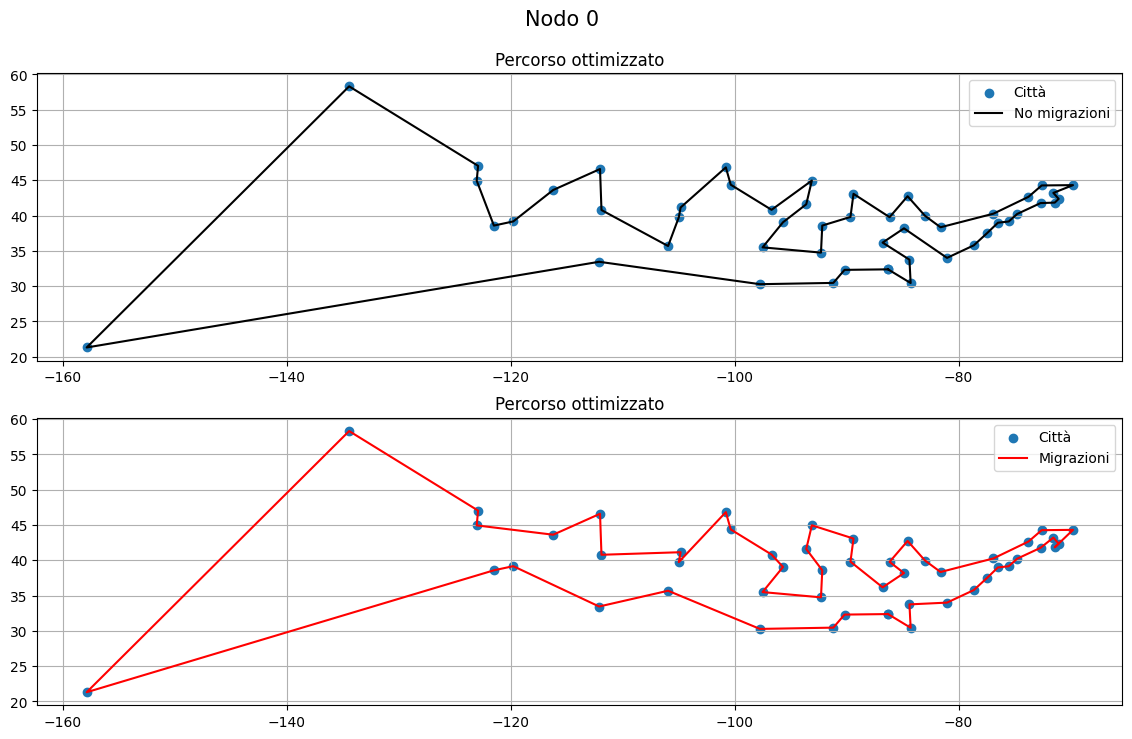

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (14, 8))

#Percorso
ax[0].set_title("Percorso ottimizzato")
ax[0].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[0].plot(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], color = 'black', label = 'No migrazioni')
ax[0].grid(True)
ax[0].legend()

#Percorso
ax[1].set_title("Percorso ottimizzato")
ax[1].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[1].plot(sconf[0, n*51 : (n+1)*51], sconf[1, n*51 : (n+1)*51], color = 'red', label = 'Migrazioni')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.9)
plt.show()

### Nodo 1

Lunghezza best (No migrazione): 280.244
Lunghezza best (migrazione): 270.034


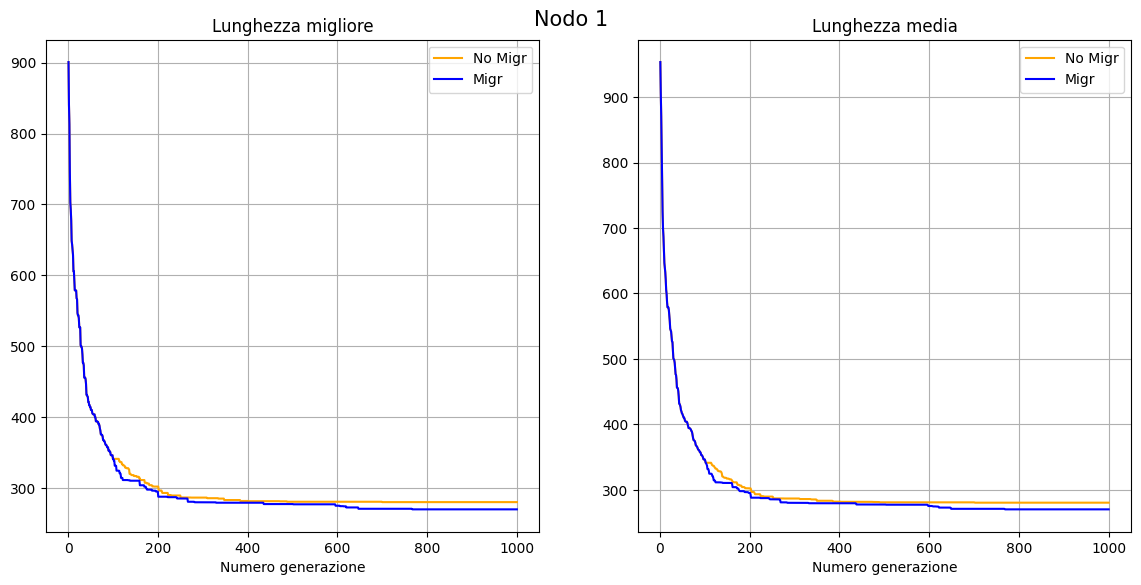

In [19]:
n = 1

fig = plt.figure(figsize = (14, 6))
print("Lunghezza best (No migrazione): " + str(nbest[1, 999 + 1000*n]))
print("Lunghezza best (migrazione): " + str(sbest[1, 999 + 1000*n]))

#Andamento best
ax1 = fig.add_subplot(121)
ax1.plot(nbest[0, n*1000 : (n+1)*1000], nbest[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax1.plot(np.array([i for i in range(1, 1001)]), sbest[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax1.set_title("Lunghezza migliore")
ax1.set_xlabel("Numero generazione")
ax1.grid(True)
ax1.legend()

#Andamento mean
ax2 = fig.add_subplot(122)
ax2.plot(nmean[0, n*1000 : (n+1)*1000], nmean[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax2.plot(np.array([i for i in range(1, 1001)]), smean[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax2.set_title("Lunghezza media")
ax2.set_xlabel("Numero generazione")
ax2.grid(True)
ax2.legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.93)
plt.show()

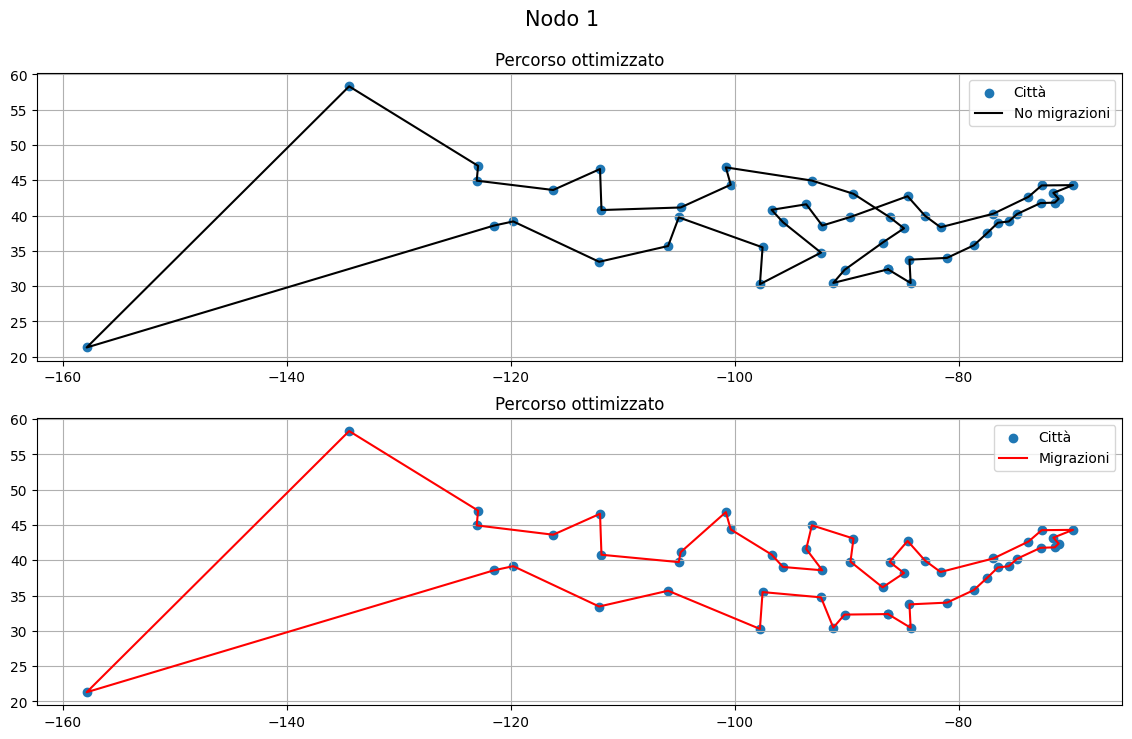

In [20]:
fig, ax = plt.subplots(2, 1, figsize = (14, 8))

#Percorso
ax[0].set_title("Percorso ottimizzato")
ax[0].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[0].plot(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], color = 'black', label = 'No migrazioni')
ax[0].grid(True)
ax[0].legend()

#Percorso
ax[1].set_title("Percorso ottimizzato")
ax[1].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[1].plot(sconf[0, n*51 : (n+1)*51], sconf[1, n*51 : (n+1)*51], color = 'red', label = 'Migrazioni')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.9)
plt.show()

### Nodo 2

Lunghezza best (No migrazione): 282.911
Lunghezza best (migrazione): 270.845


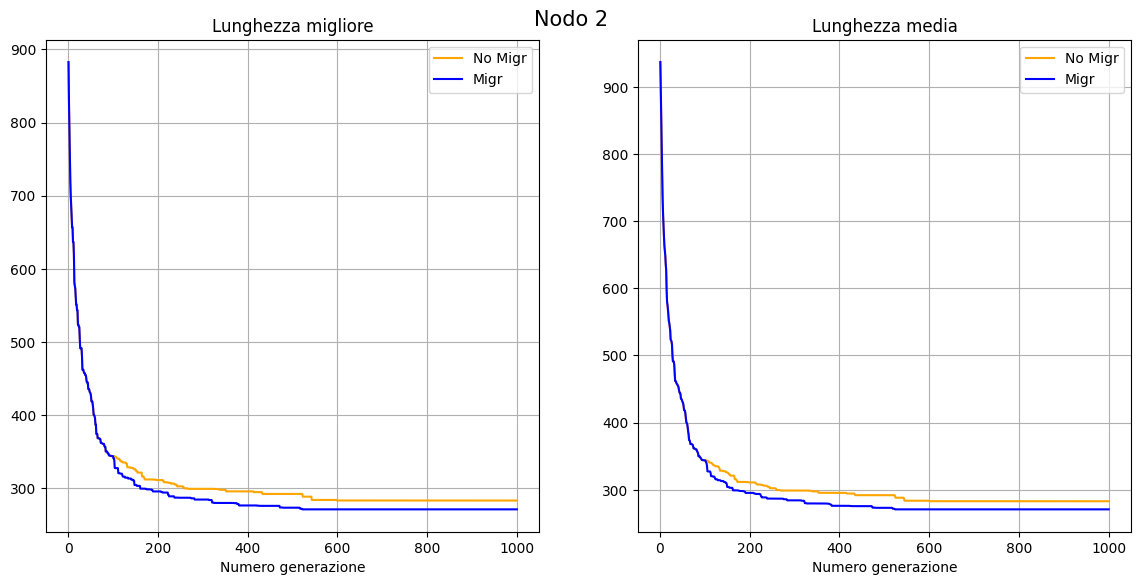

In [21]:
n = 2

fig = plt.figure(figsize = (14, 6))
print("Lunghezza best (No migrazione): " + str(nbest[1, 999 + 1000*n]))
print("Lunghezza best (migrazione): " + str(sbest[1, 999 + 1000*n]))

#Andamento best
ax1 = fig.add_subplot(121)
ax1.plot(nbest[0, n*1000 : (n+1)*1000], nbest[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax1.plot(np.array([i for i in range(1, 1001)]), sbest[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax1.set_title("Lunghezza migliore")
ax1.set_xlabel("Numero generazione")
ax1.grid(True)
ax1.legend()

#Andamento mean
ax2 = fig.add_subplot(122)
ax2.plot(nmean[0, n*1000 : (n+1)*1000], nmean[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax2.plot(np.array([i for i in range(1, 1001)]), smean[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax2.set_title("Lunghezza media")
ax2.set_xlabel("Numero generazione")
ax2.grid(True)
ax2.legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.93)
plt.show()

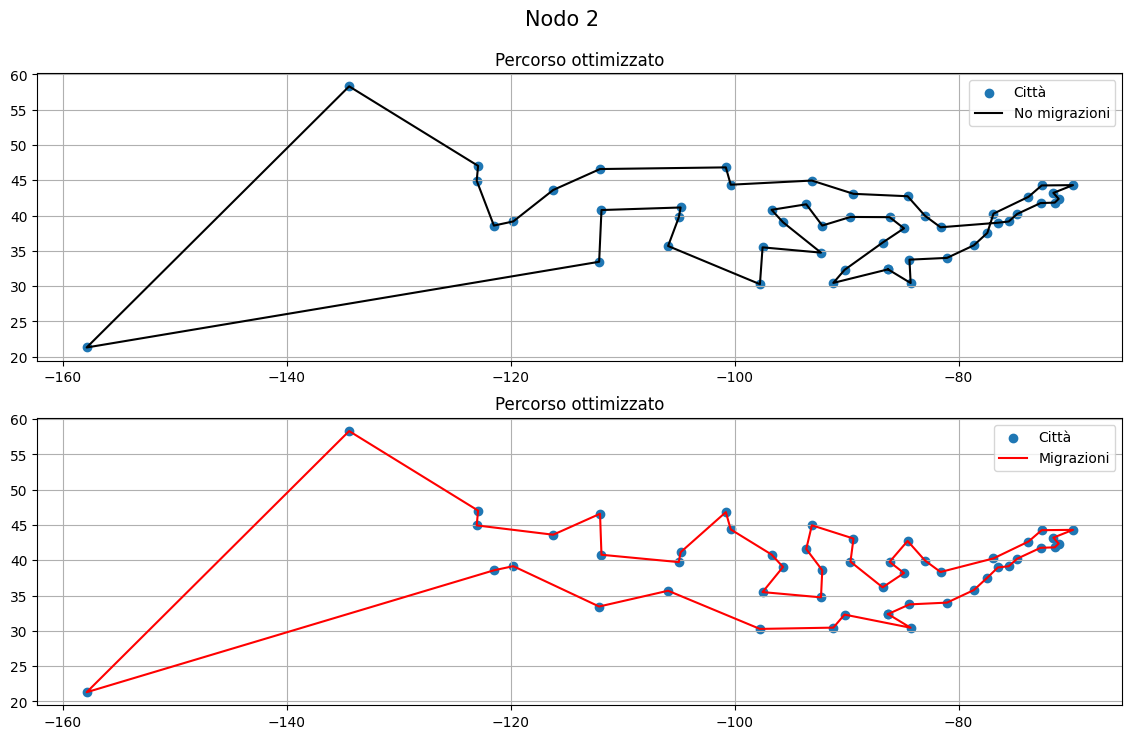

In [22]:
fig, ax = plt.subplots(2, 1, figsize = (14, 8))

#Percorso
ax[0].set_title("Percorso ottimizzato")
ax[0].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[0].plot(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], color = 'black', label = 'No migrazioni')
ax[0].grid(True)
ax[0].legend()

#Percorso
ax[1].set_title("Percorso ottimizzato")
ax[1].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[1].plot(sconf[0, n*51 : (n+1)*51], sconf[1, n*51 : (n+1)*51], color = 'red', label = 'Migrazioni')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.9)
plt.show()

### Nodo 3

Lunghezza best (No migrazione): 276.338
Lunghezza best (migrazione): 271.253


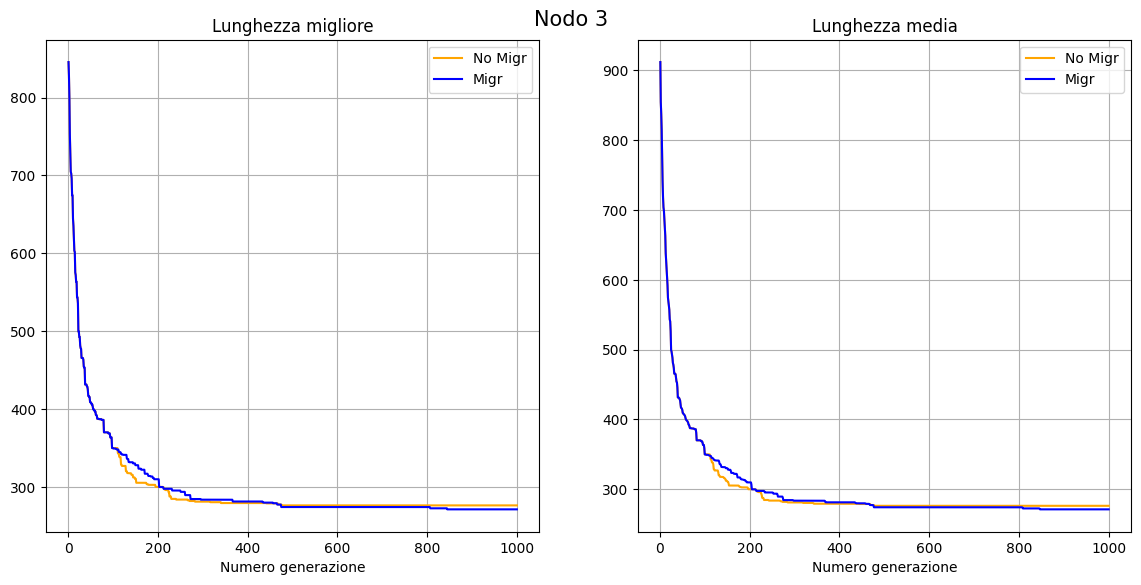

In [23]:
n = 3

fig = plt.figure(figsize = (14, 6))
print("Lunghezza best (No migrazione): " + str(nbest[1, 999 + 1000*n]))
print("Lunghezza best (migrazione): " + str(sbest[1, 999 + 1000*n]))

#Andamento best
ax1 = fig.add_subplot(121)
ax1.plot(nbest[0, n*1000 : (n+1)*1000], nbest[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax1.plot(np.array([i for i in range(1, 1001)]), sbest[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax1.set_title("Lunghezza migliore")
ax1.set_xlabel("Numero generazione")
ax1.grid(True)
ax1.legend()

#Andamento mean
ax2 = fig.add_subplot(122)
ax2.plot(nmean[0, n*1000 : (n+1)*1000], nmean[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax2.plot(np.array([i for i in range(1, 1001)]), smean[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax2.set_title("Lunghezza media")
ax2.set_xlabel("Numero generazione")
ax2.grid(True)
ax2.legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.93)
plt.show()

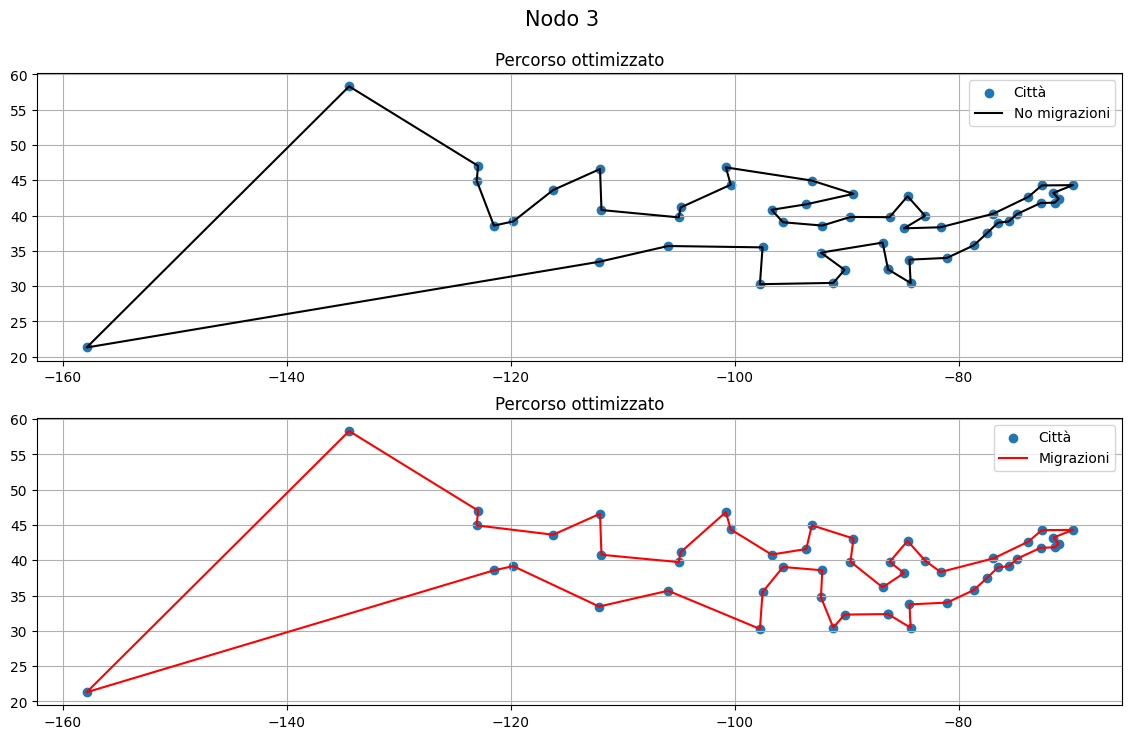

In [24]:
fig, ax = plt.subplots(2, 1, figsize = (14, 8))

#Percorso
ax[0].set_title("Percorso ottimizzato")
ax[0].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[0].plot(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], color = 'black', label = 'No migrazioni')
ax[0].grid(True)
ax[0].legend()

#Percorso
ax[1].set_title("Percorso ottimizzato")
ax[1].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[1].plot(sconf[0, n*51 : (n+1)*51], sconf[1, n*51 : (n+1)*51], color = 'red', label = 'Migrazioni')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.9)
plt.show()

### Nodo 4

Lunghezza best (No migrazione): 281.216
Lunghezza best (migrazione): 269.646


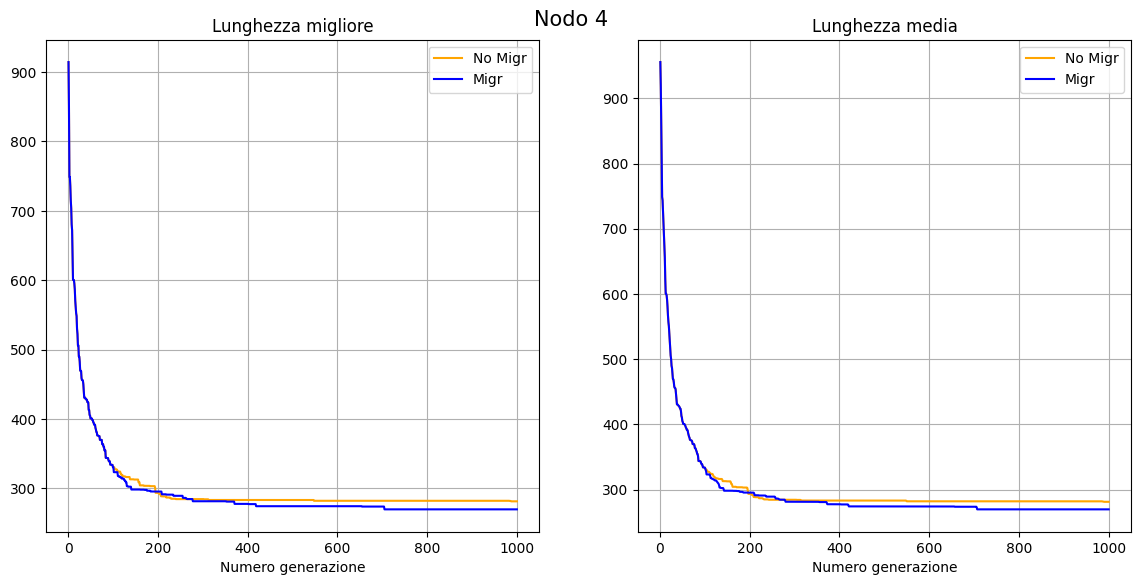

In [25]:
n = 4

fig = plt.figure(figsize = (14, 6))
print("Lunghezza best (No migrazione): " + str(nbest[1, 999 + 1000*n]))
print("Lunghezza best (migrazione): " + str(sbest[1, 999 + 1000*n]))

#Andamento best
ax1 = fig.add_subplot(121)
ax1.plot(nbest[0, n*1000 : (n+1)*1000], nbest[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax1.plot(np.array([i for i in range(1, 1001)]), sbest[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax1.set_title("Lunghezza migliore")
ax1.set_xlabel("Numero generazione")
ax1.grid(True)
ax1.legend()

#Andamento mean
ax2 = fig.add_subplot(122)
ax2.plot(nmean[0, n*1000 : (n+1)*1000], nmean[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax2.plot(np.array([i for i in range(1, 1001)]), smean[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax2.set_title("Lunghezza media")
ax2.set_xlabel("Numero generazione")
ax2.grid(True)
ax2.legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.93)
plt.show()

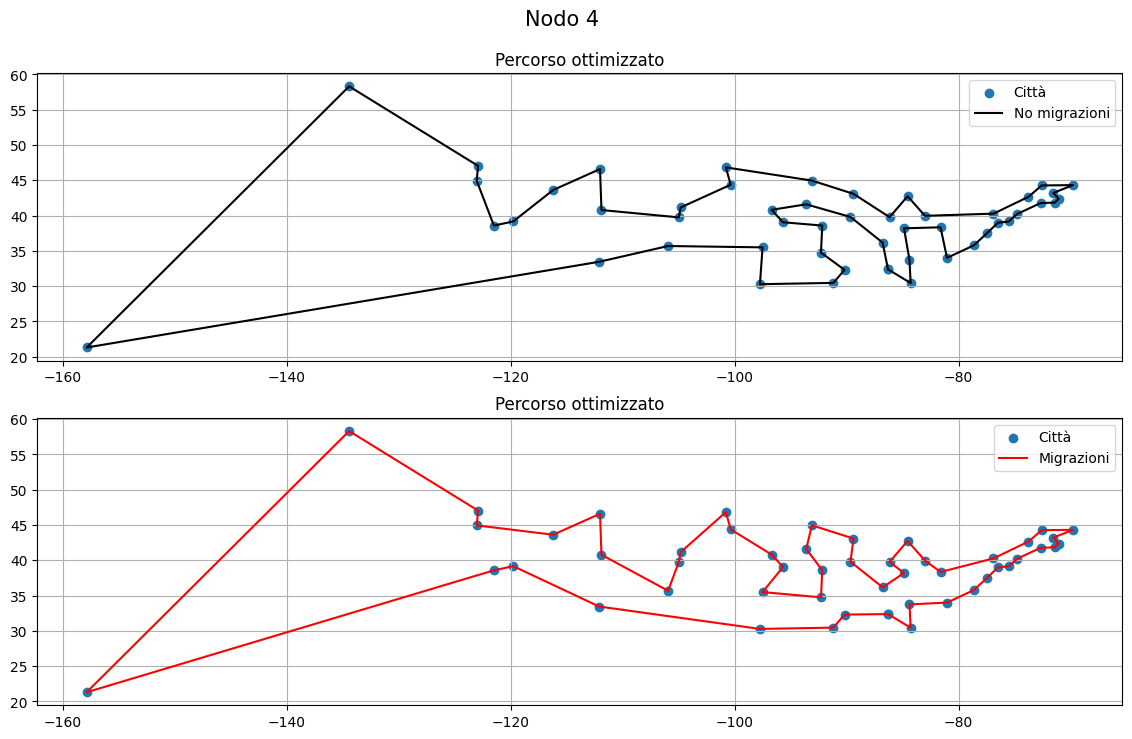

In [26]:
fig, ax = plt.subplots(2, 1, figsize = (14, 8))

#Percorso
ax[0].set_title("Percorso ottimizzato")
ax[0].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[0].plot(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], color = 'black', label = 'No migrazioni')
ax[0].grid(True)
ax[0].legend()

#Percorso
ax[1].set_title("Percorso ottimizzato")
ax[1].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[1].plot(sconf[0, n*51 : (n+1)*51], sconf[1, n*51 : (n+1)*51], color = 'red', label = 'Migrazioni')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.9)
plt.show()

### Nodo 5

Lunghezza best (No migrazione): 271.954
Lunghezza best (migrazione): 272.192


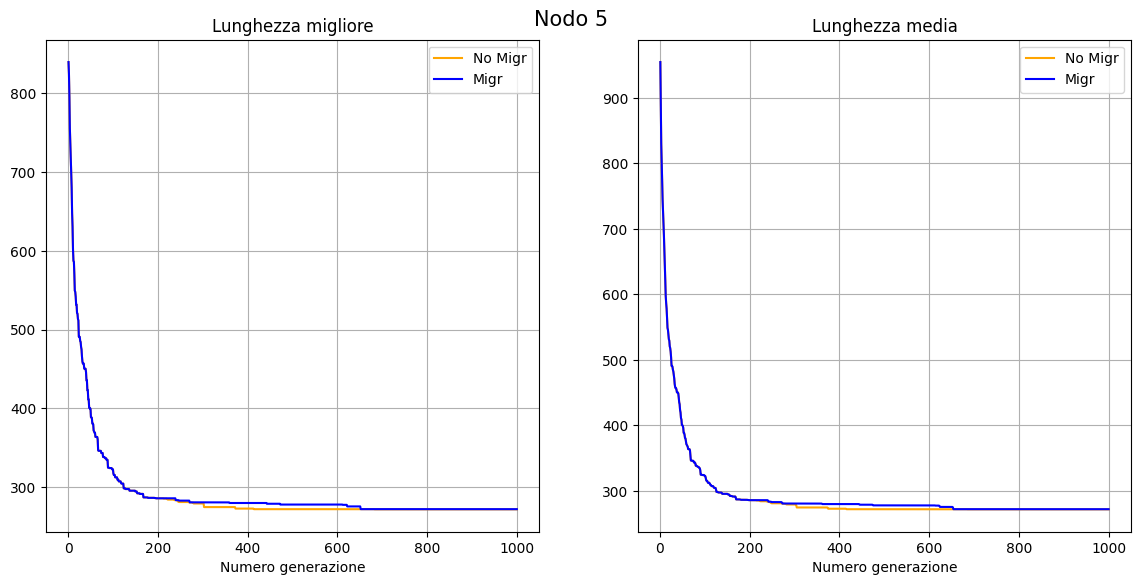

In [27]:
n = 5

fig = plt.figure(figsize = (14, 6))
print("Lunghezza best (No migrazione): " + str(nbest[1, 999 + 1000*n]))
print("Lunghezza best (migrazione): " + str(sbest[1, 999 + 1000*n]))

#Andamento best
ax1 = fig.add_subplot(121)
ax1.plot(nbest[0, n*1000 : (n+1)*1000], nbest[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax1.plot(np.array([i for i in range(1, 1001)]), sbest[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax1.set_title("Lunghezza migliore")
ax1.set_xlabel("Numero generazione")
ax1.grid(True)
ax1.legend()

#Andamento mean
ax2 = fig.add_subplot(122)
ax2.plot(nmean[0, n*1000 : (n+1)*1000], nmean[1, n*1000 : (n+1)*1000], color = 'orange', label = 'No Migr')
ax2.plot(np.array([i for i in range(1, 1001)]), smean[1, n*1000 : (n+1)*1000], color = 'blue', label = 'Migr')
ax2.set_title("Lunghezza media")
ax2.set_xlabel("Numero generazione")
ax2.grid(True)
ax2.legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.93)
plt.show()

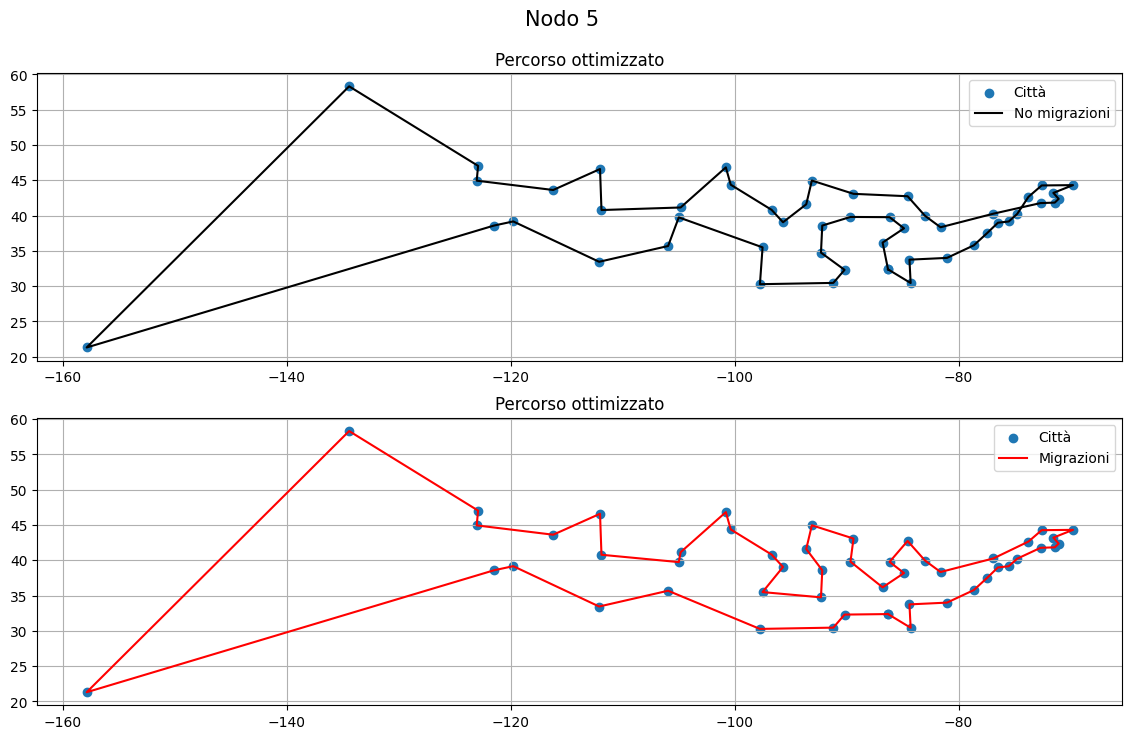

In [28]:
fig, ax = plt.subplots(2, 1, figsize = (14, 8))

#Percorso
ax[0].set_title("Percorso ottimizzato")
ax[0].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[0].plot(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], color = 'black', label = 'No migrazioni')
ax[0].grid(True)
ax[0].legend()

#Percorso
ax[1].set_title("Percorso ottimizzato")
ax[1].scatter(nconf[0, n*51 : (n+1)*51], nconf[1, n*51 : (n+1)*51], label = 'Città')
ax[1].plot(sconf[0, n*51 : (n+1)*51], sconf[1, n*51 : (n+1)*51], color = 'red', label = 'Migrazioni')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Nodo " + str(n), fontsize = "15")
plt.subplots_adjust(top=0.9)
plt.show()